<a href="https://colab.research.google.com/github/ClaFlorez/Machine_Learning_Simplifie/blob/main/8_5_Creation_du_dataset_client_realiste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJET COMPLET: Segmentation de client√®le e-commerce
Simulation de 5 segments clients cach√©s:
  ‚Ä¢ Jeunes Urbains Tech: 1000 clients, √¢ge moyen 28 ans
  ‚Ä¢ Familles Actives: 1500 clients, √¢ge moyen 38 ans
  ‚Ä¢ Seniors Ais√©s: 800 clients, √¢ge moyen 62 ans
  ‚Ä¢ √âtudiants √âconomes: 600 clients, √¢ge moyen 22 ans
  ‚Ä¢ Professionnels Premium: 1100 clients, √¢ge moyen 45 ans

G√©n√©ration du segment 'Jeunes Urbains Tech'...

G√©n√©ration du segment 'Familles Actives'...

G√©n√©ration du segment 'Seniors Ais√©s'...

G√©n√©ration du segment '√âtudiants √âconomes'...

G√©n√©ration du segment 'Professionnels Premium'...

Dataset de clients cr√©√© avec succ√®s:
  Nombre total de clients: 5,000
  P√©riode simul√©e: 2 ans d'historique
  Variables collect√©es: 14

Statistiques descriptives globales:
           age  revenu_annuel  frequence_achat_an  panier_moyen  \
count  5000.00        5000.00             5000.00       5000.00   
mean     39.48       55096.73               22.34       

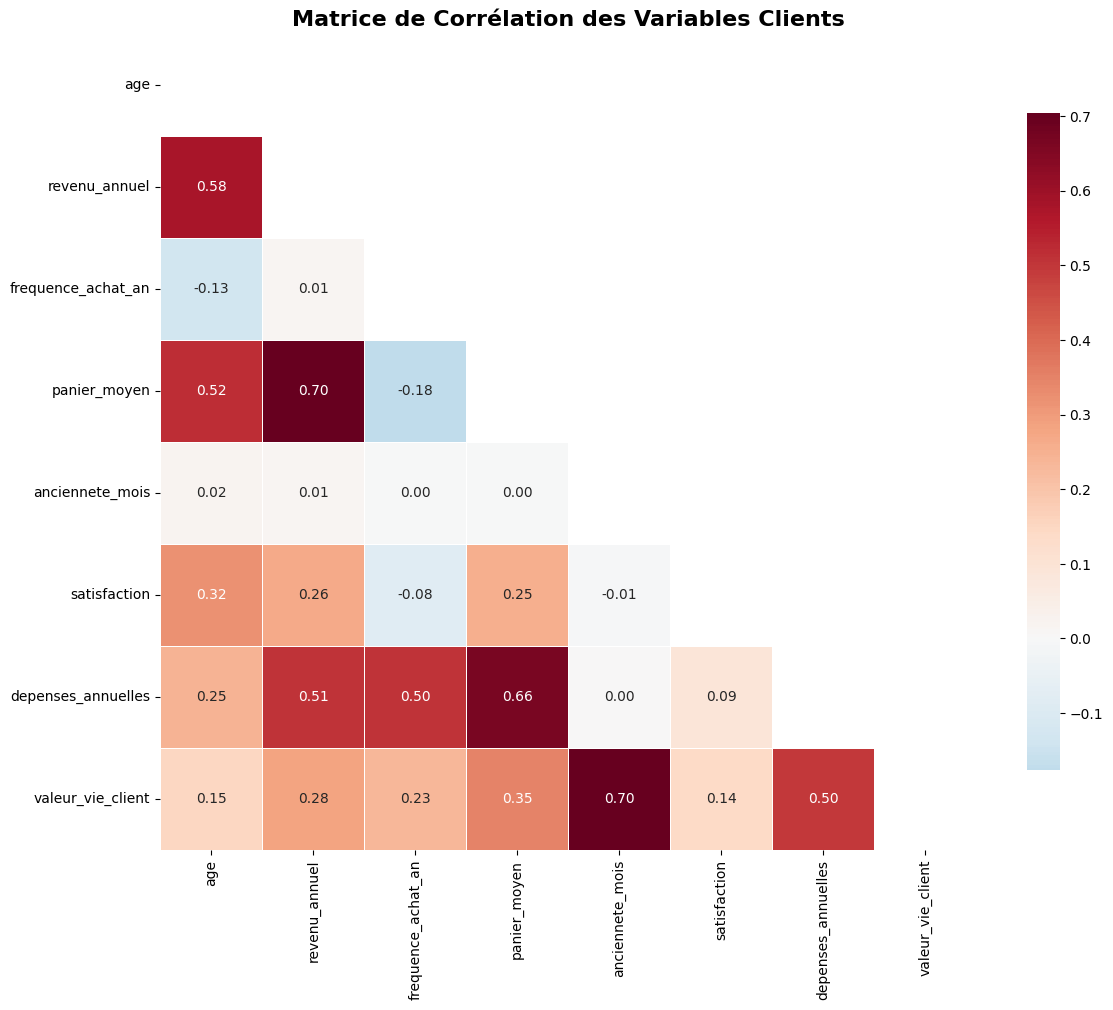


Insights des corr√©lations:
‚úÖ Corr√©lations logiques d√©tect√©es (ex: revenu ‚Üî panier moyen)
‚úÖ Pas de corr√©lation parfaite (pas de redondance totale)
‚úÖ Structure suffisamment riche pour le clustering


In [1]:
#Cr√©ation du dataset client r√©aliste
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Cr√©er un dataset de clients e-commerce ultra-r√©aliste
print("PROJET COMPLET: Segmentation de client√®le e-commerce")
print("=" * 80)

np.random.seed(42)
n_clients = 5000

# Simuler 5 segments naturels mais cach√©s dans les donn√©es
segments_caches = [
    {
        'nom': 'Jeunes Urbains Tech',
        'taille': 1000,
        'age_moy': 28, 'age_std': 5,
        'revenu_moy': 35000, 'revenu_std': 8000,
        'freq_achat': 24, 'freq_std': 6,
        'panier_moy': 85, 'panier_std': 25,
        'mobile_pct': 0.9, 'satisfaction_moy': 4.1
    },
    {
        'nom': 'Familles Actives',
        'taille': 1500,
        'age_moy': 38, 'age_std': 8,
        'revenu_moy': 55000, 'revenu_std': 12000,
        'freq_achat': 36, 'freq_std': 10,
        'panier_moy': 120, 'panier_std': 35,
        'mobile_pct': 0.7, 'satisfaction_moy': 3.9
    },
    {
        'nom': 'Seniors Ais√©s',
        'taille': 800,
        'age_moy': 62, 'age_std': 10,
        'revenu_moy': 70000, 'revenu_std': 15000,
        'freq_achat': 12, 'freq_std': 4,
        'panier_moy': 200, 'panier_std': 60,
        'mobile_pct': 0.3, 'satisfaction_moy': 4.3
    },
    {
        'nom': '√âtudiants √âconomes',
        'taille': 600,
        'age_moy': 22, 'age_std': 3,
        'revenu_moy': 15000, 'revenu_std': 5000,
        'freq_achat': 8, 'freq_std': 3,
        'panier_moy': 45, 'panier_std': 15,
        'mobile_pct': 0.95, 'satisfaction_moy': 3.6
    },
    {
        'nom': 'Professionnels Premium',
        'taille': 1100,
        'age_moy': 45, 'age_std': 8,
        'revenu_moy': 85000, 'revenu_std': 20000,
        'freq_achat': 18, 'freq_std': 5,
        'panier_moy': 300, 'panier_std': 80,
        'mobile_pct': 0.6, 'satisfaction_moy': 4.2
    }
]

print(f"Simulation de {len(segments_caches)} segments clients cach√©s:")
for segment in segments_caches:
    print(f"  ‚Ä¢ {segment['nom']}: {segment['taille']} clients, √¢ge moyen {segment['age_moy']} ans")

clients_data = []

for segment in segments_caches:
    print(f"\nG√©n√©ration du segment '{segment['nom']}'...")

    for i in range(segment['taille']):
        # Caract√©ristiques d√©mographiques
        age = max(18, min(80, np.random.normal(segment['age_moy'], segment['age_std'])))
        revenu = max(10000, np.random.normal(segment['revenu_moy'], segment['revenu_std']))

        # Comportement d'achat
        freq_achat = max(1, np.random.normal(segment['freq_achat'], segment['freq_std']))
        panier_moyen = max(20, np.random.normal(segment['panier_moy'], segment['panier_std']))

        # Variables d√©riv√©es r√©alistes
        anciennete_mois = np.random.exponential(18)  # Distribution r√©aliste d'anciennet√©
        nb_retours = max(0, np.random.poisson(freq_achat * 0.08))  # 8% de taux de retour
        utilise_mobile = np.random.choice([0, 1], p=[1-segment['mobile_pct'], segment['mobile_pct']])

        # Satisfaction (corr√©l√©e avec autres facteurs)
        satisfaction_base = segment['satisfaction_moy']
        # Ajuster selon l'√¢ge et le service
        if age > 60:
            satisfaction_base += 0.2  # Seniors plus indulgents
        if panier_moyen > segment['panier_moy'] * 1.5:
            satisfaction_base -= 0.3  # Gros achats = plus exigeants

        satisfaction = np.clip(satisfaction_base + np.random.normal(0, 0.5), 1, 5)

        # D√©penses totales annuelles avec variabilit√©
        depenses_base = freq_achat * panier_moyen
        variation_saisonniere = np.random.uniform(0.8, 1.3)  # Variation ¬±30%
        depenses_annuelles = depenses_base * variation_saisonniere

        # M√©triques avanc√©es
        taux_retour = nb_retours / max(1, freq_achat)
        valeur_vie_client = depenses_annuelles * (anciennete_mois / 12) * (satisfaction / 5)

        # Pr√©f√©rences produits (simul√©es)
        pref_electronique = np.random.beta(2, 5) if segment['nom'] == 'Jeunes Urbains Tech' else np.random.beta(1, 3)
        pref_maison = np.random.beta(3, 2) if segment['nom'] == 'Familles Actives' else np.random.beta(1, 4)
        pref_luxe = np.random.beta(4, 2) if 'Premium' in segment['nom'] or 'Ais√©s' in segment['nom'] else np.random.beta(1, 5)

        clients_data.append({
            'client_id': f'C{len(clients_data)+1:05d}',
            'age': age,
            'revenu_annuel': revenu,
            'frequence_achat_an': freq_achat,
            'panier_moyen': panier_moyen,
            'anciennete_mois': anciennete_mois,
            'nb_retours': nb_retours,
            'taux_retour': taux_retour,
            'utilise_mobile': utilise_mobile,
            'satisfaction': satisfaction,
            'depenses_annuelles': depenses_annuelles,
            'valeur_vie_client': valeur_vie_client,
            'pref_electronique': pref_electronique,
            'pref_maison': pref_maison,
            'pref_luxe': pref_luxe,
            'segment_reel': segment['nom']  # Pour validation (normalement inconnue)
        })

df_clients = pd.DataFrame(clients_data)

print(f"\nDataset de clients cr√©√© avec succ√®s:")
print(f"  Nombre total de clients: {len(df_clients):,}")
print(f"  P√©riode simul√©e: 2 ans d'historique")
print(f"  Variables collect√©es: {len(df_clients.columns) - 2}")  # -2 pour client_id et segment_reel

# Statistiques descriptives
print(f"\nStatistiques descriptives globales:")
print("=" * 50)
stats_desc = df_clients.describe()
print(stats_desc.round(2))

# Exploration des corr√©lations
print(f"\nAnalyse des corr√©lations entre variables:")
print("=" * 50)

features_numeriques = ['age', 'revenu_annuel', 'frequence_achat_an', 'panier_moyen',
                      'anciennete_mois', 'satisfaction', 'depenses_annuelles', 'valeur_vie_client']

correlation_matrix = df_clients[features_numeriques].corr()

# Afficher les corr√©lations les plus fortes
print("Corr√©lations significatives (|r| > 0.3):")
for i in range(len(features_numeriques)):
    for j in range(i+1, len(features_numeriques)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.3:
            var1, var2 = features_numeriques[i], features_numeriques[j]
            print(f"  ‚Ä¢ {var1} ‚Üî {var2}: {corr:+.3f}")

# Visualisation de la matrice de corr√©lation
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
           square=True, linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matrice de Corr√©lation des Variables Clients', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nInsights des corr√©lations:")
print("‚úÖ Corr√©lations logiques d√©tect√©es (ex: revenu ‚Üî panier moyen)")
print("‚úÖ Pas de corr√©lation parfaite (pas de redondance totale)")
print("‚úÖ Structure suffisamment riche pour le clustering")


√âTAPE 2: Pr√©paration des donn√©es pour clustering
Features s√©lectionn√©es pour le clustering:
  ‚Ä¢ age: 39.48 ¬± 14.29
  ‚Ä¢ revenu_annuel: 55096.73 ¬± 26073.80
  ‚Ä¢ frequence_achat_an: 22.34 ¬± 12.03
  ‚Ä¢ panier_moyen: 156.02 ¬± 101.30
  ‚Ä¢ anciennete_mois: 18.11 ¬± 18.05
  ‚Ä¢ satisfaction: 4.03 ¬± 0.55
  ‚Ä¢ utilise_mobile: 0.68 ¬± 0.47
  ‚Ä¢ taux_retour: 0.08 ¬± 0.07
  ‚Ä¢ pref_electronique: 0.26 ¬± 0.18
  ‚Ä¢ pref_maison: 0.32 ¬± 0.25
  ‚Ä¢ pref_luxe: 0.36 ¬± 0.29

D√©tection des valeurs aberrantes:
  ‚úÖ age: 38 outliers (0.8%)
  ‚úÖ revenu_annuel: 16 outliers (0.3%)
  ‚úÖ frequence_achat_an: 29 outliers (0.6%)
  ‚úÖ panier_moyen: 65 outliers (1.3%)
  ‚úÖ anciennete_mois: 237 outliers (4.7%)
  ‚úÖ satisfaction: 14 outliers (0.3%)
  ‚úÖ utilise_mobile: 0 outliers (0.0%)
  ‚úÖ taux_retour: 118 outliers (2.4%)
  ‚úÖ pref_electronique: 39 outliers (0.8%)
  ‚úÖ pref_maison: 0 outliers (0.0%)
  ‚úÖ pref_luxe: 0 outliers (0.0%)

Total outliers d√©tect√©es: 556
‚ö†Ô∏è Beaucoup d'

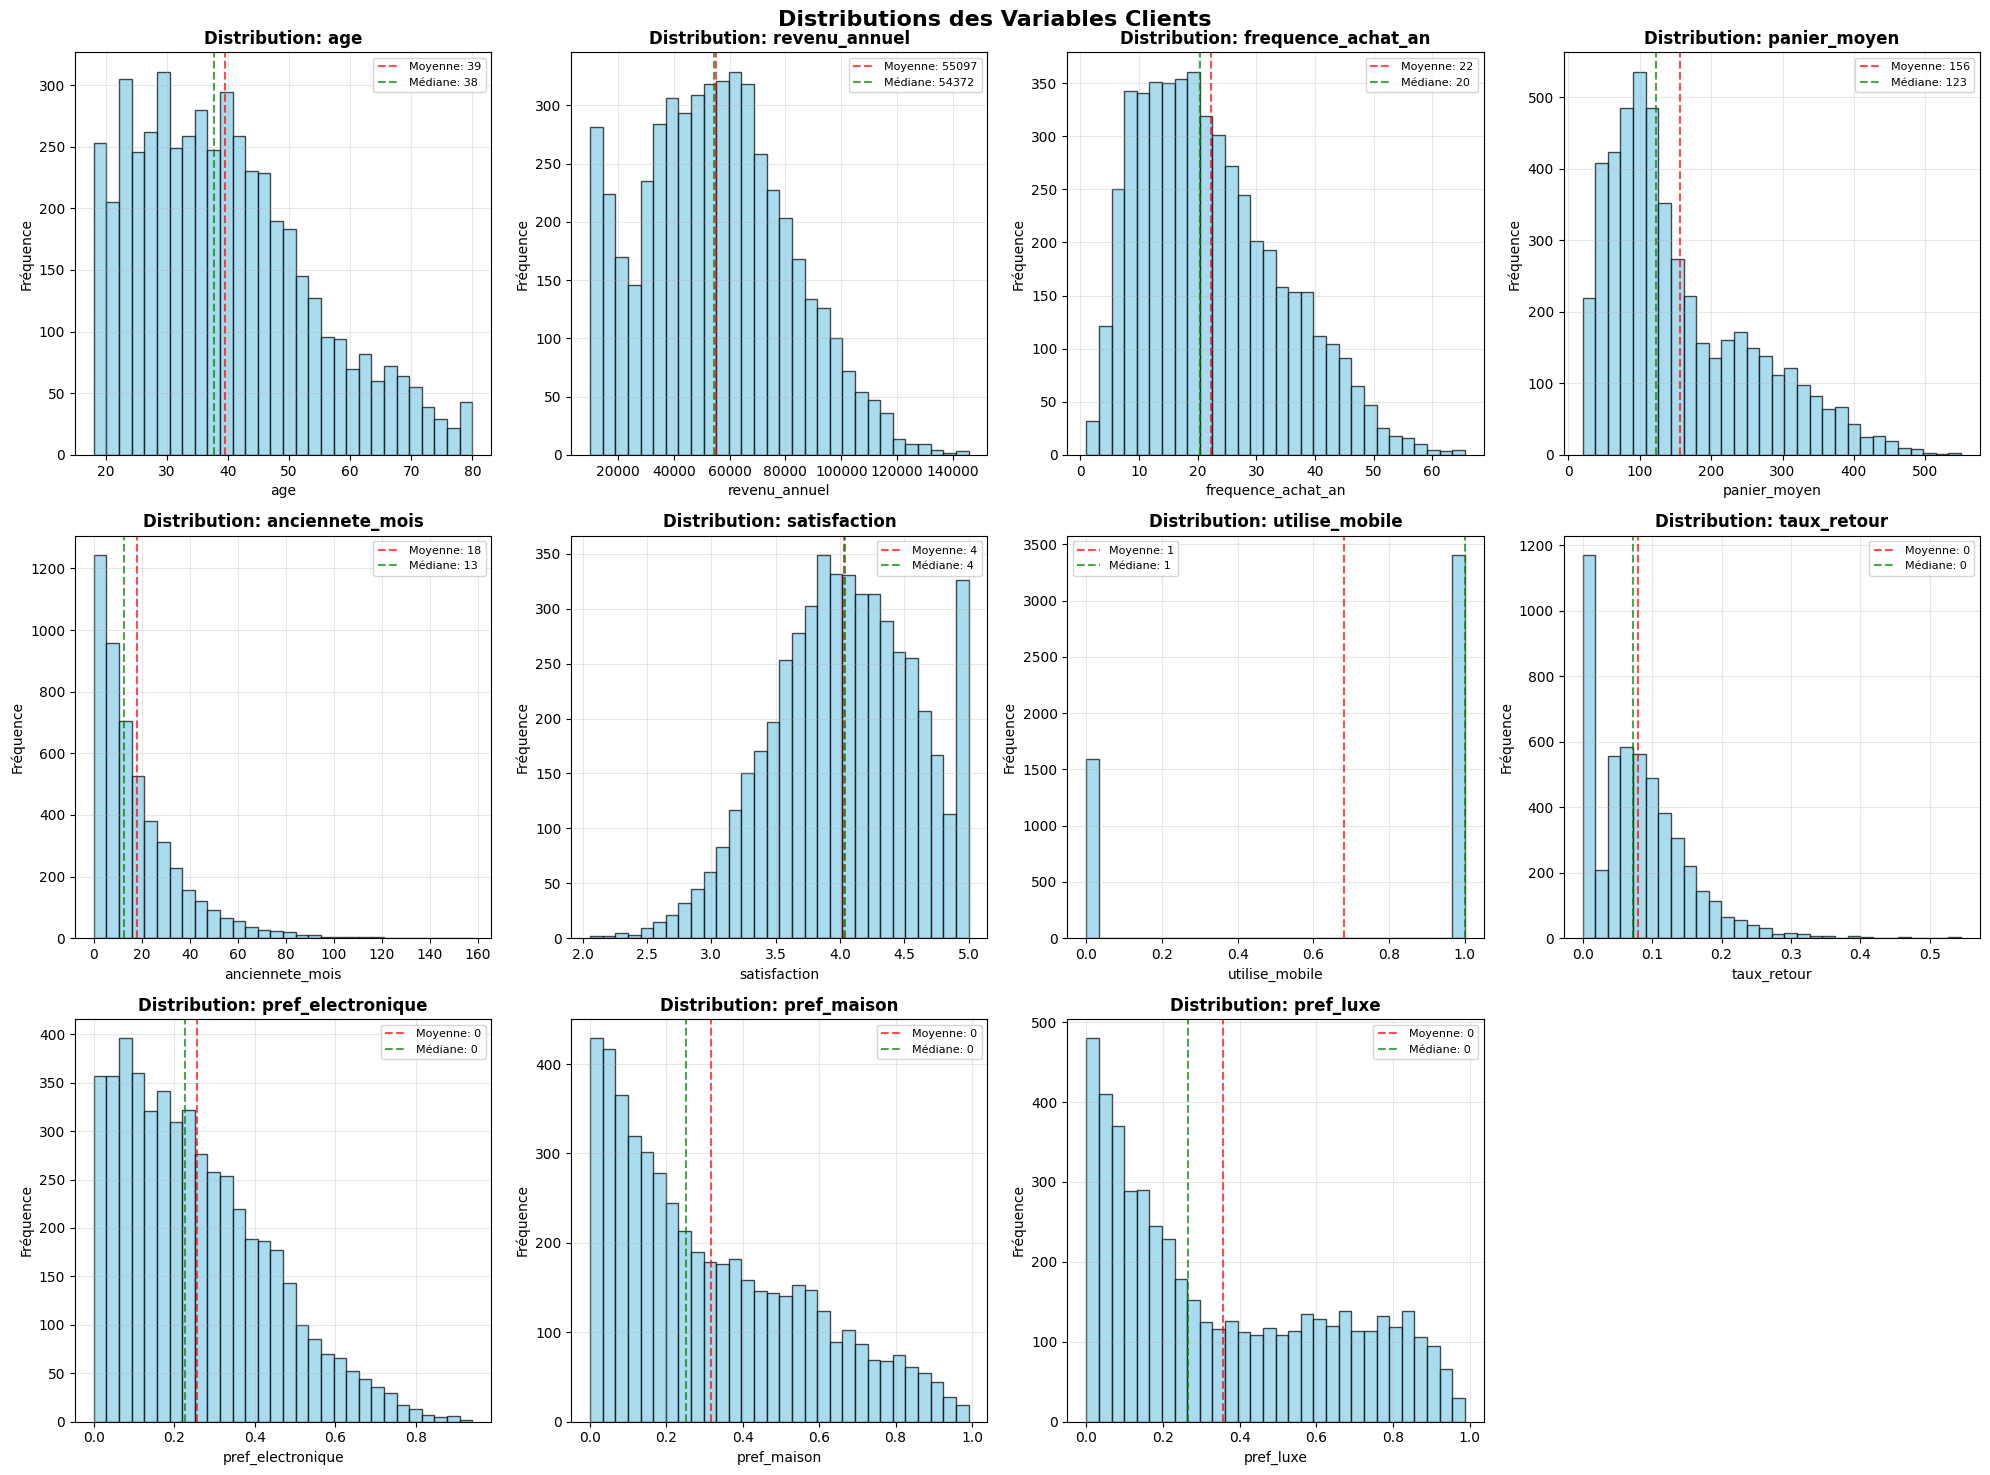

In [2]:
# √âtape 2: Pr√©paration des donn√©es pour clustering
print("\n√âTAPE 2: Pr√©paration des donn√©es pour clustering")
print("=" * 60)

# S√©lectionner les features pertinentes pour le clustering
features_clustering = [
    'age', 'revenu_annuel', 'frequence_achat_an', 'panier_moyen',
    'anciennete_mois', 'satisfaction', 'utilise_mobile', 'taux_retour',
    'pref_electronique', 'pref_maison', 'pref_luxe'
]

X = df_clients[features_clustering].copy()

print(f"Features s√©lectionn√©es pour le clustering:")
for feature in features_clustering:
    print(f"  ‚Ä¢ {feature}: {X[feature].mean():.2f} ¬± {X[feature].std():.2f}")

# D√©tection et traitement des valeurs aberrantes
print(f"\nD√©tection des valeurs aberrantes:")
print("=" * 40)

outliers_detected = {}
for feature in features_clustering:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((X[feature] < lower_bound) | (X[feature] > upper_bound)).sum()
    outliers_pct = outliers / len(X) * 100

    outliers_detected[feature] = outliers

    if outliers_pct > 5:
        print(f"  ‚ö†Ô∏è {feature}: {outliers} outliers ({outliers_pct:.1f}%)")
    else:
        print(f"  ‚úÖ {feature}: {outliers} outliers ({outliers_pct:.1f}%)")

# D√©cision sur le traitement des outliers
total_outliers = sum(outliers_detected.values())
print(f"\nTotal outliers d√©tect√©es: {total_outliers}")

if total_outliers / len(X) > 0.1:
    print("‚ö†Ô∏è Beaucoup d'outliers - Utilisation de RobustScaler recommand√©e")
    scaler = RobustScaler()  # Moins sensible aux outliers
    scaling_method = "RobustScaler (r√©sistant aux outliers)"
else:
    print("‚úÖ Peu d'outliers - StandardScaler suffisant")
    scaler = StandardScaler()
    scaling_method = "StandardScaler (standard)"

print(f"M√©thode de standardisation choisie: {scaling_method}")

# Standardisation
X_scaled = scaler.fit_transform(X)

print(f"\nV√©rification de la standardisation:")
print("Moyennes apr√®s standardisation (doivent √™tre ~0):")
for i, feature in enumerate(features_clustering):
    mean_scaled = X_scaled[:, i].mean()
    std_scaled = X_scaled[:, i].std()
    print(f"  {feature}: moyenne={mean_scaled:.3f}, √©cart-type={std_scaled:.3f}")

# Analyse des distributions apr√®s standardisation
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(features_clustering):
    if i < len(axes):
        axes[i].hist(X[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution: {feature}', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Fr√©quence')
        axes[i].grid(True, alpha=0.3)

        # Ajouter statistiques sur le graphique
        mean_val = X[feature].mean()
        median_val = X[feature].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Moyenne: {mean_val:.0f}')
        axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'M√©diane: {median_val:.0f}')
        axes[i].legend(fontsize=8)

# Masquer les axes non utilis√©s
for i in range(len(features_clustering), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Distributions des Variables Clients', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


√âTAPE 3: Comparaison des algorithmes de clustering
Recherche du nombre optimal de clusters (K-Means):
------------------------------------------------------------
K=2: Silhouette=0.247, Calinski=1603, Davies-Bouldin=1.642
K=3: Silhouette=0.199, Calinski=1260, Davies-Bouldin=1.776
K=4: Silhouette=0.202, Calinski=1084, Davies-Bouldin=1.593
K=5: Silhouette=0.190, Calinski=934, Davies-Bouldin=1.598
K=6: Silhouette=0.158, Calinski=845, Davies-Bouldin=1.908
K=7: Silhouette=0.138, Calinski=772, Davies-Bouldin=1.887
K=8: Silhouette=0.141, Calinski=720, Davies-Bouldin=1.857
K=9: Silhouette=0.141, Calinski=681, Davies-Bouldin=1.816
K=10: Silhouette=0.137, Calinski=648, Davies-Bouldin=1.869


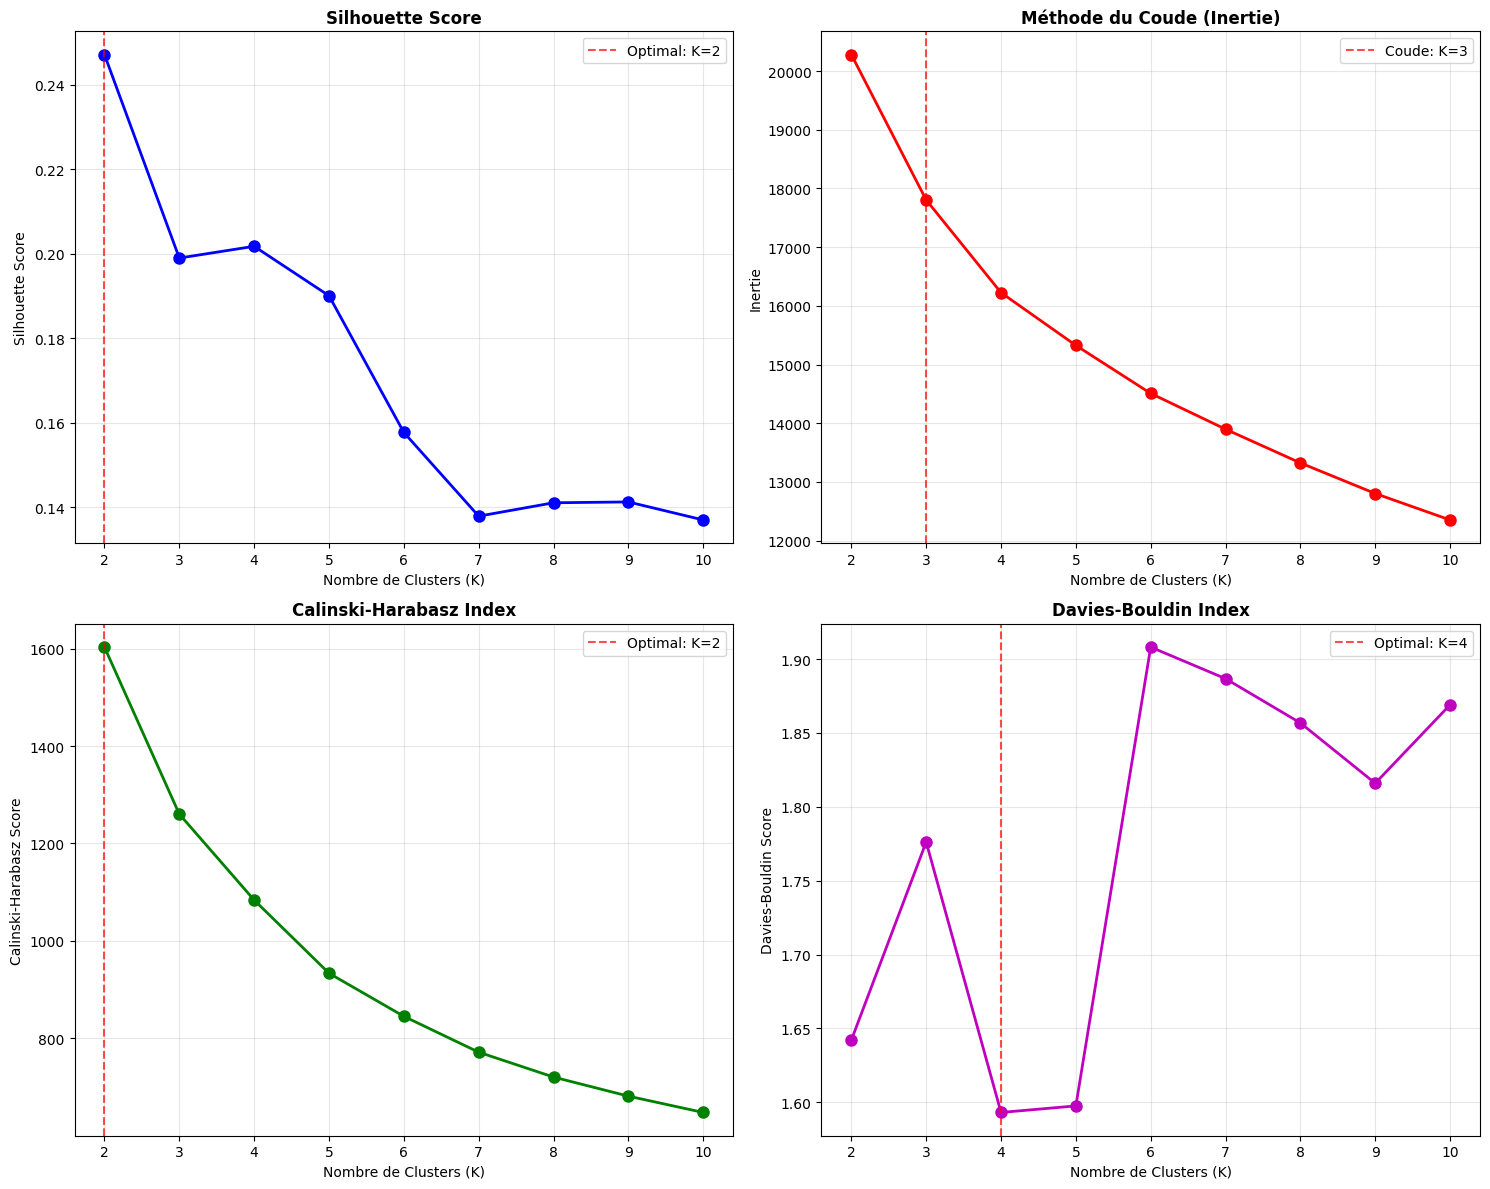


Recommandations par m√©trique:
  ‚Ä¢ Silhouette Score: K=2
  ‚Ä¢ Calinski-Harabasz: K=2
  ‚Ä¢ Davies-Bouldin: K=4
  ‚Ä¢ M√©thode du coude: K=3

Choix du nombre de clusters:
‚úÖ MAJORIT√â: K=2 (2 votes)

Comparaison des algorithmes avec K=2:
Algorithme      Silhouette   N_Clusters   N_Noise    Commentaire
--------------------------------------------------------------------------------
K-Means         0.247        2            0          S√©paration faible
Hi√©rarchique    0.220        2            0          S√©paration faible
DBSCAN          -1.000       1            5          eps=2.425

Meilleur algorithme: K-Means
  Silhouette Score: 0.247
  Nombre de clusters: 2


In [4]:
# √âtape 3: Comparaison exhaustive des m√©thodes
print("\n√âTAPE 3: Comparaison des algorithmes de clustering")
print("=" * 70)

from sklearn.metrics import davies_bouldin_score # Import davies_bouldin_score

# Recherche du nombre optimal de clusters pour K-Means
print("Recherche du nombre optimal de clusters (K-Means):")
print("-" * 60)

k_range = range(2, 11)
kmeans_metrics = {
    'silhouette': [],
    'calinski': [],
    'inertia': [],
    'davies_bouldin': []
}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    # Calculer toutes les m√©triques
    sil_score = silhouette_score(X_scaled, clusters)
    cal_score = calinski_harabasz_score(X_scaled, clusters)
    db_score = davies_bouldin_score(X_scaled, clusters)

    kmeans_metrics['silhouette'].append(sil_score)
    kmeans_metrics['calinski'].append(cal_score)
    kmeans_metrics['davies_bouldin'].append(db_score)
    kmeans_metrics['inertia'].append(kmeans.inertia_)

    print(f"K={k}: Silhouette={sil_score:.3f}, Calinski={cal_score:.0f}, Davies-Bouldin={db_score:.3f}")

# Visualiser les m√©triques d'optimisation
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Silhouette Score
axes[0, 0].plot(k_range, kmeans_metrics['silhouette'], 'bo-', linewidth=2, markersize=8)
best_k_sil = k_range[np.argmax(kmeans_metrics['silhouette'])]
axes[0, 0].axvline(best_k_sil, color='red', linestyle='--', alpha=0.7,
                  label=f'Optimal: K={best_k_sil}')
axes[0, 0].set_title('Silhouette Score', fontweight='bold')
axes[0, 0].set_xlabel('Nombre de Clusters (K)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# M√©thode du coude (Inertie)
axes[0, 1].plot(k_range, kmeans_metrics['inertia'], 'ro-', linewidth=2, markersize=8)
# D√©tecter le coude automatiquement
diffs = np.diff(kmeans_metrics['inertia'])
second_diffs = np.diff(diffs)
elbow_k = k_range[np.argmax(second_diffs) + 1]
axes[0, 1].axvline(elbow_k, color='red', linestyle='--', alpha=0.7,
                  label=f'Coude: K={elbow_k}')
axes[0, 1].set_title('M√©thode du Coude (Inertie)', fontweight='bold')
axes[0, 1].set_xlabel('Nombre de Clusters (K)')
axes[0, 1].set_ylabel('Inertie')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Calinski-Harabasz
axes[1, 0].plot(k_range, kmeans_metrics['calinski'], 'go-', linewidth=2, markersize=8)
best_k_cal = k_range[np.argmax(kmeans_metrics['calinski'])]
axes[1, 0].axvline(best_k_cal, color='red', linestyle='--', alpha=0.7,
                  label=f'Optimal: K={best_k_cal}')
axes[1, 0].set_title('Calinski-Harabasz Index', fontweight='bold')
axes[1, 0].set_xlabel('Nombre de Clusters (K)')
axes[1, 0].set_ylabel('Calinski-Harabasz Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Davies-Bouldin (plus bas = mieux)
axes[1, 1].plot(k_range, kmeans_metrics['davies_bouldin'], 'mo-', linewidth=2, markersize=8)
best_k_db = k_range[np.argmin(kmeans_metrics['davies_bouldin'])]
axes[1, 1].axvline(best_k_db, color='red', linestyle='--', alpha=0.7,
                  label=f'Optimal: K={best_k_db}')
axes[1, 1].set_title('Davies-Bouldin Index', fontweight='bold')
axes[1, 1].set_xlabel('Nombre de Clusters (K)')
axes[1, 1].set_ylabel('Davies-Bouldin Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Consensus des m√©triques
recommendations = [best_k_sil, best_k_cal, best_k_db, elbow_k]
print(f"\nRecommandations par m√©trique:")
print(f"  ‚Ä¢ Silhouette Score: K={best_k_sil}")
print(f"  ‚Ä¢ Calinski-Harabasz: K={best_k_cal}")
print(f"  ‚Ä¢ Davies-Bouldin: K={best_k_db}")
print(f"  ‚Ä¢ M√©thode du coude: K={elbow_k}")

# Choisir K par vote majoritaire ou silhouette (plus fiable)
from collections import Counter
votes = Counter(recommendations)
k_vote = votes.most_common(1)[0][0]

print(f"\nChoix du nombre de clusters:")
if len(set(recommendations)) == 1:
    k_optimal = recommendations[0]
    print(f"‚úÖ CONSENSUS TOTAL: K={k_optimal}")
elif votes[k_vote] >= 2:
    k_optimal = k_vote
    print(f"‚úÖ MAJORIT√â: K={k_optimal} ({votes[k_vote]} votes)")
else:
    k_optimal = best_k_sil  # Privil√©gier silhouette en cas d'√©galit√©
    print(f"‚ö†Ô∏è D√âSACCORD: Utilisation du Silhouette Score ‚Üí K={k_optimal}")

# Comparer les 3 algorithmes avec K optimal
print(f"\nComparaison des algorithmes avec K={k_optimal}:")
print("=" * 70)

algorithms = {}

# K-Means
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters_kmeans = kmeans_final.fit_predict(X_scaled)
sil_kmeans = silhouette_score(X_scaled, clusters_kmeans)

algorithms['K-Means'] = {
    'clusters': clusters_kmeans,
    'silhouette': sil_kmeans,
    'n_clusters': k_optimal,
    'algorithm': kmeans_final
}

# Clustering Hi√©rarchique
Z = linkage(X_scaled, method='ward')
clusters_hierarchical = fcluster(Z, k_optimal, criterion='maxclust')
sil_hierarchical = silhouette_score(X_scaled, clusters_hierarchical)

algorithms['Hi√©rarchique'] = {
    'clusters': clusters_hierarchical,
    'silhouette': sil_hierarchical,
    'n_clusters': k_optimal,
    'algorithm': None
}

# DBSCAN (optimisation automatique des param√®tres)
from sklearn.neighbors import NearestNeighbors

# Estimation d'eps avec k-distance
k_neighbors = 4
nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = distances[:, k_neighbors-1]
k_distances_sorted = np.sort(k_distances)

# D√©tecter le coude dans k-distance
diffs = np.diff(k_distances_sorted)
second_diffs = np.diff(diffs)
knee_point = np.argmax(second_diffs)
eps_optimal = k_distances_sorted[knee_point]

# Tester DBSCAN
dbscan = DBSCAN(eps=eps_optimal, min_samples=k_neighbors)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Analyser DBSCAN
n_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

if n_clusters_dbscan > 1:
    mask_no_noise = clusters_dbscan != -1
    if mask_no_noise.sum() > 1:
        sil_dbscan = silhouette_score(X_scaled[mask_no_noise], clusters_dbscan[mask_no_noise])
    else:
        sil_dbscan = -1
else:
    sil_dbscan = -1

algorithms['DBSCAN'] = {
    'clusters': clusters_dbscan,
    'silhouette': sil_dbscan,
    'n_clusters': n_clusters_dbscan,
    'n_noise': n_noise,
    'eps': eps_optimal,
    'algorithm': dbscan
}

# Tableau comparatif
print(f"{'Algorithme':<15} {'Silhouette':<12} {'N_Clusters':<12} {'N_Noise':<10} {'Commentaire'}")
print("-" * 80)

for algo_name, results in algorithms.items():
    n_noise = results.get('n_noise', 0)
    sil_score = results['silhouette']
    n_clust = results['n_clusters']

    if algo_name == 'DBSCAN':
        comment = f"eps={results['eps']:.3f}"
    elif sil_score > 0.5:
        comment = "Excellente s√©paration"
    elif sil_score > 0.3:
        comment = "Bonne s√©paration"
    else:
        comment = "S√©paration faible"

    print(f"{algo_name:<15} {sil_score:<12.3f} {n_clust:<12} {n_noise:<10} {comment}")

# Choisir le meilleur algorithme
best_algorithm = max(algorithms.keys(),
                    key=lambda k: algorithms[k]['silhouette'] if algorithms[k]['silhouette'] > -1 else -999)

print(f"\nMeilleur algorithme: {best_algorithm}")
print(f"  Silhouette Score: {algorithms[best_algorithm]['silhouette']:.3f}")
print(f"  Nombre de clusters: {algorithms[best_algorithm]['n_clusters']}")

# Utiliser le meilleur clustering pour l'analyse
best_clusters = algorithms[best_algorithm]['clusters']
df_clients['segment_final'] = best_clusters


√âTAPE 4: Analyse des segments

Caract√©ristiques moyennes par segment:


age  revenu_annuel  frequence_achat_an  panier_moyen  \
segment_final                                                           
0              31.74       40766.90               26.64         93.37   
1              52.17       78576.46               15.29        258.67   

               anciennete_mois  satisfaction  utilise_mobile  taux_retour  \
segment_final                                                               
0                        17.87          3.88            0.82         0.08   
1                        18.51          4.29            0.46         0.08   

               pref_electronique  pref_maison  pref_luxe  
segment_final                                             
0                           0.26         0.39       0.17  
1                           0.25         0.20       0.66


Comparaison avec les segments r√©els (√† titre de validation):

Mapping des segments trouv√©s aux segments r√©els:
segment_final
0          Familles Actives
1    Professionnels Premium
Name: segment_reel, dtype: object

Caract√©ristiques moyennes des segments r√©els:


age  revenu_annuel  frequence_achat_an  \
segment_reel                                                       
Familles Actives        38.04       54818.69               35.78   
Jeunes Urbains Tech     28.11       34793.15               24.19   
Professionnels Premium  44.92       85144.94               17.77   
Seniors Ais√©s           62.01       69378.72               11.91   
√âtudiants √âconomes      22.06       15500.05                7.90   

                        panier_moyen  anciennete_mois  satisfaction  \
segment_reel                                                          
Familles Actives              118.02            18.03          3.86   
Jeunes Urbains Tech            84.88            16.94          4.10   
Professionnels Premium        298.41            17.78          4.20   
Seniors Ais√©s                 203.09            19.48          4.39   
√âtudiants √âconomes             45.80            19.05          3.56   

                        utilise_mobile  taux_retour  pref_electronique  \
segment_reel                                                             
Familles Actives                  0.71         0.08               0.25   
Jeunes Urbains Tech               0.90         0.08               0.29   
Professionnels Premium            0.59         0.08               0.25   
Seniors Ais√©s                     0.28         0.08               0.25   
√âtudiants √âconomes                0.95         0.09               0.24   

                        pref_maison  pref_luxe  
segment_reel                                    
Familles Actives               0.59       0.17  
Jeunes Urbains Tech            0.20       0.17  
Professionnels Premium         0.20       0.66  
Seniors Ais√©s                  0.19       0.67  
√âtudiants √âconomes             0.20       0.16


Visualisation des segments:


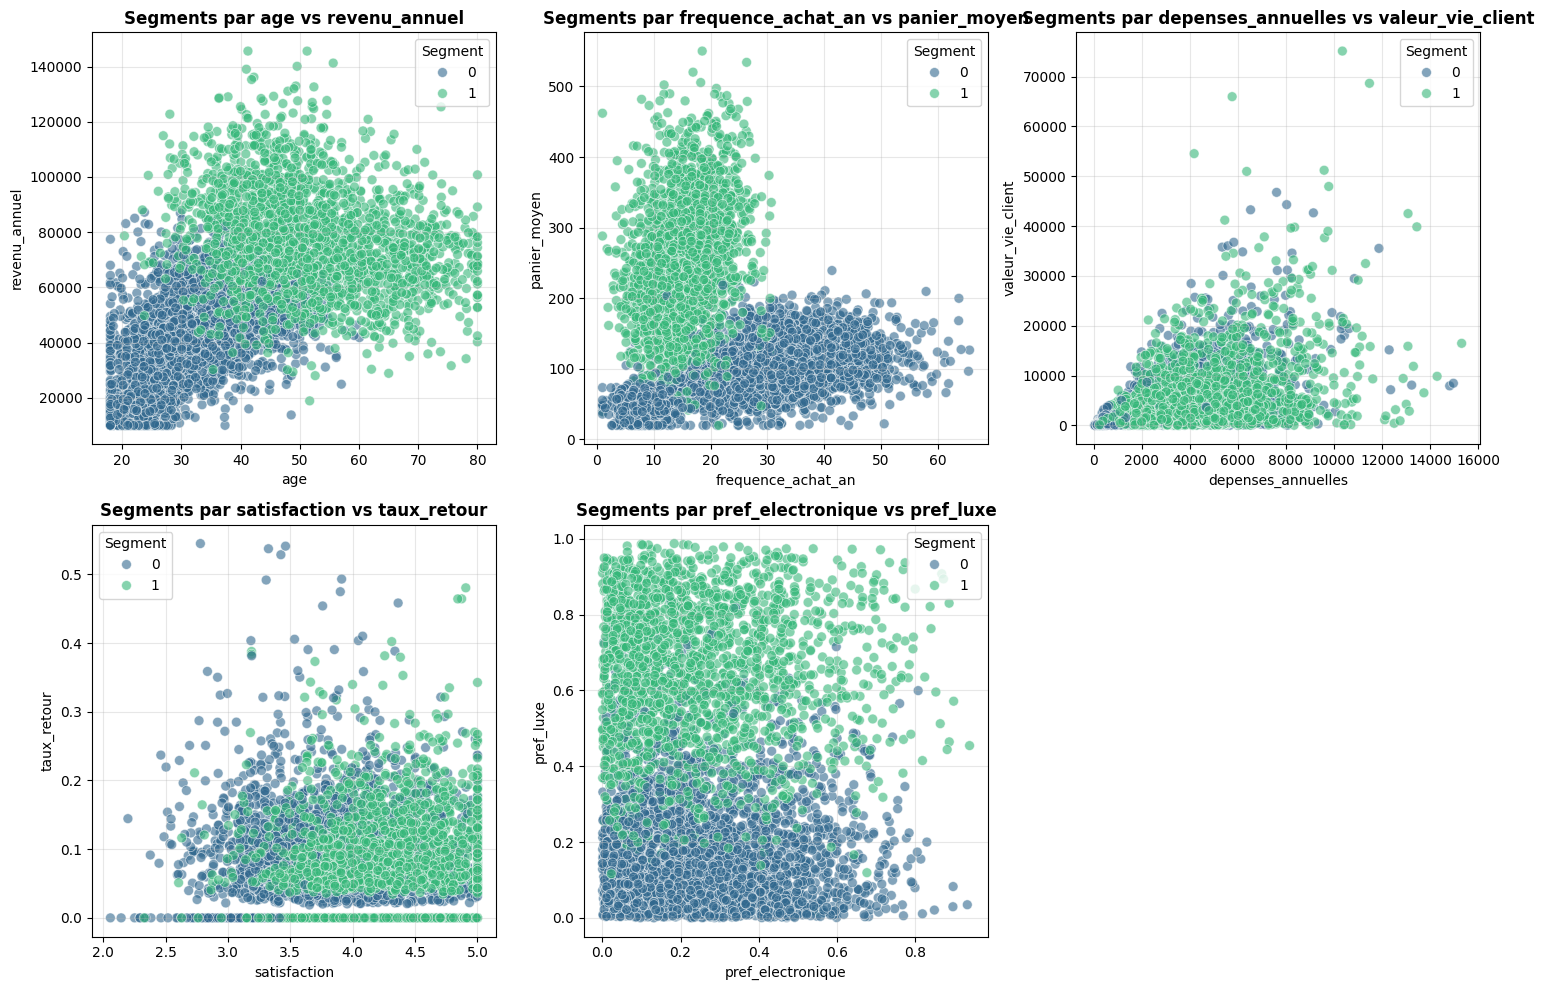

In [5]:
# √âtape 4: Analyse des segments
print("\n√âTAPE 4: Analyse des segments")
print("=" * 60)

# Ajouter les clusters au DataFrame original (si ce n'est pas d√©j√† fait)
# Assurez-vous que la colonne 'segment_final' est pr√©sente

# Analyse des caract√©ristiques moyennes par segment
segment_characteristics = df_clients.groupby('segment_final')[features_clustering].mean()

print("\nCaract√©ristiques moyennes par segment:")
print("=" * 40)
display(segment_characteristics.round(2))

# Comparaison avec les segments r√©els cach√©s (si disponibles)
if 'segment_reel' in df_clients.columns:
    print("\nComparaison avec les segments r√©els (√† titre de validation):")
    print("=" * 60)
    real_segment_mapping = df_clients.groupby('segment_final')['segment_reel'].agg(lambda x: x.value_counts().index[0])
    print("\nMapping des segments trouv√©s aux segments r√©els:")
    print(real_segment_mapping)

    # Visualisation comparative des caract√©ristiques r√©elles vs trouv√©es
    real_segment_characteristics = df_clients.groupby('segment_reel')[features_clustering].mean()
    print("\nCaract√©ristiques moyennes des segments r√©els:")
    display(real_segment_characteristics.round(2))

    # Note: Les indices de segment (0, 1, ...) ne correspondent pas forc√©ment aux indices des segments r√©els.
    # Il faut interpr√©ter les caract√©ristiques pour faire le rapprochement.

# Visualisation des segments sur des paires de caract√©ristiques importantes
print("\nVisualisation des segments:")
print("=" * 40)

# S√©lectionner quelques paires de caract√©ristiques pour visualiser
# Exemples bas√©s sur les corr√©lations ou l'int√©r√™t m√©tier
pairs_to_plot = [
    ('age', 'revenu_annuel'),
    ('frequence_achat_an', 'panier_moyen'),
    ('depenses_annuelles', 'valeur_vie_client'),
    ('satisfaction', 'taux_retour'),
    ('pref_electronique', 'pref_luxe')
]

plt.figure(figsize=(15, 10))

for i, (x_var, y_var) in enumerate(pairs_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df_clients, x=x_var, y=y_var, hue='segment_final', palette='viridis', s=50, alpha=0.6)
    plt.title(f'Segments par {x_var} vs {y_var}', fontweight='bold')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Segment')

plt.tight_layout()
plt.show()

In [6]:
# √âtape 5: Analyse approfondie des segments
print("\n√âTAPE 4: Analyse des segments d√©couverts")
print("=" * 70)

# Analyser chaque segment en d√©tail
segments_profiles = []
unique_segments = sorted(set(best_clusters))

for segment_id in unique_segments:
    if segment_id == -1:  # Cas DBSCAN avec bruit
        segment_data = df_clients[df_clients['segment_final'] == segment_id]
        print(f"\nSEGMENT BRUIT/ANOMALIES ({len(segment_data)} clients):")
        print(f"  Ces clients ne s'int√®grent dans aucun groupe standard")
        print(f"  Analyse individuelle recommand√©e")
        continue

    segment_data = df_clients[df_clients['segment_final'] == segment_id]

    if len(segment_data) == 0:
        continue

    print(f"\n" + "="*60)
    print(f"SEGMENT {segment_id} ({len(segment_data)} clients - {len(segment_data)/len(df_clients)*100:.1f}%)")
    print("="*60)

    # 1. PROFIL D√âMOGRAPHIQUE
    age_moy = segment_data['age'].mean()
    age_median = segment_data['age'].median()
    revenu_moy = segment_data['revenu_annuel'].mean()
    anciennete_moy = segment_data['anciennete_mois'].mean()

    print(f"üìä PROFIL D√âMOGRAPHIQUE:")
    print(f"  ‚Ä¢ √Çge moyen: {age_moy:.0f} ans (m√©diane: {age_median:.0f})")
    print(f"  ‚Ä¢ Revenu moyen: {revenu_moy:,.0f}‚Ç¨/an")
    print(f"  ‚Ä¢ Anciennet√© moyenne: {anciennete_moy:.0f} mois")

    # Cat√©goriser l'√¢ge
    if age_moy < 30:
        age_category = "Jeunes"
    elif age_moy < 50:
        age_category = "Adultes"
    else:
        age_category = "Seniors"

    # Cat√©goriser le revenu
    if revenu_moy < 30000:
        revenu_category = "Revenus modestes"
    elif revenu_moy < 60000:
        revenu_category = "Classe moyenne"
    else:
        revenu_category = "Revenus √©lev√©s"

    # 2. COMPORTEMENT D'ACHAT
    freq_moy = segment_data['frequence_achat_an'].mean()
    panier_moy = segment_data['panier_moyen'].mean()
    depenses_moy = segment_data['depenses_annuelles'].mean()
    taux_retour_moy = segment_data['taux_retour'].mean()

    print(f"\nüõí COMPORTEMENT D'ACHAT:")
    print(f"  ‚Ä¢ Fr√©quence: {freq_moy:.0f} achats/an")
    print(f"  ‚Ä¢ Panier moyen: {panier_moy:.0f}‚Ç¨")
    print(f"  ‚Ä¢ D√©penses totales: {depenses_moy:,.0f}‚Ç¨/an")
    print(f"  ‚Ä¢ Taux de retour: {taux_retour_moy:.1%}")

    # Cat√©goriser le comportement
    if freq_moy > 30:
        freq_category = "Acheteurs fr√©quents"
    elif freq_moy > 15:
        freq_category = "Acheteurs r√©guliers"
    else:
        freq_category = "Acheteurs occasionnels"

    if panier_moy > 200:
        panier_category = "Gros paniers"
    elif panier_moy > 100:
        panier_category = "Paniers moyens"
    else:
        panier_category = "Petits paniers"

    # 3. PR√âF√âRENCES ET SATISFACTION
    satisfaction_moy = segment_data['satisfaction'].mean()
    mobile_pct = segment_data['utilise_mobile'].mean() * 100
    pref_elec = segment_data['pref_electronique'].mean()
    pref_maison = segment_data['pref_maison'].mean()
    pref_luxe = segment_data['pref_luxe'].mean()

    print(f"\nüíù PR√âF√âRENCES ET SATISFACTION:")
    print(f"  ‚Ä¢ Satisfaction: {satisfaction_moy:.1f}/5")
    print(f"  ‚Ä¢ Utilisation mobile: {mobile_pct:.0f}%")
    print(f"  ‚Ä¢ Pr√©f√©rence √©lectronique: {pref_elec:.2f}")
    print(f"  ‚Ä¢ Pr√©f√©rence maison: {pref_maison:.2f}")
    print(f"  ‚Ä¢ Pr√©f√©rence luxe: {pref_luxe:.2f}")

    # Identifier la pr√©f√©rence dominante
    preferences = {'√âlectronique': pref_elec, 'Maison': pref_maison, 'Luxe': pref_luxe}
    pref_dominante = max(preferences, key=preferences.get)

    # 4. VALEUR CLIENT
    clv_moy = segment_data['valeur_vie_client'].mean()

    print(f"\nüí∞ VALEUR CLIENT:")
    print(f"  ‚Ä¢ CLV moyenne: {clv_moy:,.0f}‚Ç¨")

    # Cat√©goriser la valeur
    if clv_moy > 15000:
        valeur_category = "Tr√®s haute valeur"
        priorite = "MAXIMALE"
    elif clv_moy > 8000:
        valeur_category = "Haute valeur"
        priorite = "HAUTE"
    elif clv_moy > 3000:
        valeur_category = "Valeur moyenne"
        priorite = "MOYENNE"
    else:
        valeur_category = "Faible valeur"
        priorite = "D√âVELOPPEMENT"

    print(f"  ‚Ä¢ Cat√©gorie de valeur: {valeur_category}")
    print(f"  ‚Ä¢ Priorit√© business: {priorite}")

    # 5. PROFIL SYNTH√âTIQUE
    print(f"\nüéØ PROFIL SYNTH√âTIQUE:")

    # G√©n√©rer un nom de segment bas√© sur les caract√©ristiques
    if age_category == "Jeunes" and mobile_pct > 80 and pref_dominante == "√âlectronique":
        nom_segment = "Digital Natives"
        description = "Jeunes technophiles, mobiles-first, friands d'√©lectronique"
    elif age_category == "Seniors" and valeur_category in ["Haute valeur", "Tr√®s haute valeur"]:
        nom_segment = "Seniors Premium"
        description = "Clients matures et ais√©s, privil√©gient la qualit√©"
    elif freq_category == "Acheteurs fr√©quents" and panier_category == "Paniers moyens":
        nom_segment = "Familles Actives"
        description = "Ach√®tent r√©guli√®rement pour les besoins familiaux"
    elif panier_category == "Gros paniers" and pref_dominante == "Luxe":
        nom_segment = "Clients Premium"
        description = "Gros d√©pensiers orient√©s luxe et qualit√©"
    elif revenu_category == "Revenus modestes" and taux_retour_moy < 0.05:
        nom_segment = "√âconomes Fid√®les"
        description = "Budget serr√© mais fid√®les, peu de retours"
    else:
        nom_segment = f"Segment {segment_id}"
        description = f"{age_category}, {revenu_category}, {freq_category}"

    print(f"  ‚Ä¢ Nom sugg√©r√©: {nom_segment}")
    print(f"  ‚Ä¢ Description: {description}")

    # 6. STRAT√âGIE MARKETING RECOMMAND√âE
    print(f"\nüìà STRAT√âGIE MARKETING:")

    # Canal de communication
    if mobile_pct > 80:
        canal = "Mobile-first (app, notifications push, SMS)"
    elif mobile_pct > 50:
        canal = "Multi-canal (mobile + email + web)"
    else:
        canal = "Traditionnel (email, courrier, t√©l√©phone)"

    # Timing optimal
    if age_moy < 35:
        timing = "Soir√©es (18h-22h) et week-ends"
    elif age_moy > 55:
        timing = "Matin√©es (9h-12h) et apr√®s-midi (14h-17h)"
    else:
        timing = "Heures de bureau (9h-18h)"

    # Type de contenu
    if pref_dominante == "√âlectronique":
        contenu = "High-tech, innovations, comparatifs techniques"
    elif pref_dominante == "Luxe":
        contenu = "Exclusivit√©, prestige, qualit√© premium"
    elif pref_dominante == "Maison":
        contenu = "Famille, confort, praticit√©"
    else:
        contenu = "Polyvalent, rapport qualit√©-prix"

    # Fr√©quence de contact
    if freq_moy > 30:
        freq_contact = "Hebdomadaire (clients tr√®s actifs)"
    elif freq_moy > 15:
        freq_contact = "Bi-mensuelle (clients r√©guliers)"
    else:
        freq_contact = "Mensuelle (clients occasionnels)"

    print(f"  ‚Ä¢ Canal: {canal}")
    print(f"  ‚Ä¢ Timing: {timing}")
    print(f"  ‚Ä¢ Contenu: {contenu}")
    print(f"  ‚Ä¢ Fr√©quence: {freq_contact}")

    # Budget marketing sugg√©r√© (% de la CLV)
    budget_marketing = clv_moy * 0.15  # 15% de la CLV
    print(f"  ‚Ä¢ Budget sugg√©r√©: {budget_marketing:,.0f}‚Ç¨ par client")

    # 7. ACTIONS CONCR√àTES
    print(f"\nüöÄ ACTIONS CONCR√àTES:")

    if priorite == "MAXIMALE":
        actions = [
            "Programme VIP avec avantages exclusifs",
            "Account manager d√©di√©",
            "Offres personnalis√©es premium",
            "Support prioritaire 24/7"
        ]
    elif priorite == "HAUTE":
        actions = [
            "Programme de fid√©lit√© renforc√©",
            "Recommandations personnalis√©es",
            "Offres early-bird",
            "Support t√©l√©phonique d√©di√©"
        ]
    elif priorite == "MOYENNE":
        actions = [
            "Newsletters cibl√©es",
            "Promotions saisonni√®res",
            "Programme de parrainage",
            "Support email r√©actif"
        ]
    else:  # D√âVELOPPEMENT
        actions = [
            "Offres d'activation (premiers achats)",
            "Codes promo attractifs",
            "Contenu √©ducatif",
            "Onboarding simplifi√©"
        ]

    for action in actions:
        print(f"    ‚Ä¢ {action}")

    # Stocker le profil pour analyse globale
    segments_profiles.append({
        'segment_id': segment_id,
        'nom': nom_segment,
        'description': description,
        'taille': len(segment_data),
        'age_moy': age_moy,
        'revenu_moy': revenu_moy,
        'clv_moy': clv_moy,
        'priorite': priorite,
        'canal': canal,
        'budget_marketing': budget_marketing
    })

# Analyse comparative des segments
print(f"\n" + "="*80)
print("ANALYSE COMPARATIVE DES SEGMENTS")
print("="*80)

segments_df = pd.DataFrame(segments_profiles)
if len(segments_df) > 0:
    segments_df = segments_df.sort_values('clv_moy', ascending=False)

    print(f"Classement par valeur client:")
    for idx, row in segments_df.iterrows():
        pct_clients = row['taille'] / len(df_clients) * 100
        print(f"\n{row['segment_id']}. {row['nom']} ({row['priorite']}):")
        print(f"   üìä Taille: {row['taille']:,} clients ({pct_clients:.1f}%)")
        print(f"   üí∞ CLV moyenne: {row['clv_moy']:,.0f}‚Ç¨")
        print(f"   üéØ Budget marketing total: {row['budget_marketing'] * row['taille']:,.0f}‚Ç¨")
        print(f"   üì± Canal principal: {row['canal']}")


√âTAPE 4: Analyse des segments d√©couverts

SEGMENT 0 (3105 clients - 62.1%)
üìä PROFIL D√âMOGRAPHIQUE:
  ‚Ä¢ √Çge moyen: 32 ans (m√©diane: 31)
  ‚Ä¢ Revenu moyen: 40,767‚Ç¨/an
  ‚Ä¢ Anciennet√© moyenne: 18 mois

üõí COMPORTEMENT D'ACHAT:
  ‚Ä¢ Fr√©quence: 27 achats/an
  ‚Ä¢ Panier moyen: 93‚Ç¨
  ‚Ä¢ D√©penses totales: 2,904‚Ç¨/an
  ‚Ä¢ Taux de retour: 8.2%

üíù PR√âF√âRENCES ET SATISFACTION:
  ‚Ä¢ Satisfaction: 3.9/5
  ‚Ä¢ Utilisation mobile: 82%
  ‚Ä¢ Pr√©f√©rence √©lectronique: 0.26
  ‚Ä¢ Pr√©f√©rence maison: 0.39
  ‚Ä¢ Pr√©f√©rence luxe: 0.17

üí∞ VALEUR CLIENT:
  ‚Ä¢ CLV moyenne: 3,379‚Ç¨
  ‚Ä¢ Cat√©gorie de valeur: Valeur moyenne
  ‚Ä¢ Priorit√© business: MOYENNE

üéØ PROFIL SYNTH√âTIQUE:
  ‚Ä¢ Nom sugg√©r√©: Segment 0
  ‚Ä¢ Description: Adultes, Classe moyenne, Acheteurs r√©guliers

üìà STRAT√âGIE MARKETING:
  ‚Ä¢ Canal: Mobile-first (app, notifications push, SMS)
  ‚Ä¢ Timing: Soir√©es (18h-22h) et week-ends
  ‚Ä¢ Contenu: Famille, confort, praticit√©
  ‚Ä¢ Fr√©quence: B

In [7]:
# √âtape 5: Validation et calcul ROI
print("\n√âTAPE 5: Validation et calcul du ROI business")
print("=" * 70)

# Comparer avec les vrais segments (validation)
if 'segment_reel' in df_clients.columns:
    from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

    # Encoder les vrais segments pour la comparaison
    vrais_segments_encoded = pd.Categorical(df_clients['segment_reel']).codes

    # Calculer l'accord
    ari_score = adjusted_rand_score(vrais_segments_encoded, best_clusters)
    nmi_score = normalized_mutual_info_score(vrais_segments_encoded, best_clusters)

    print(f"Validation contre les vrais segments:")
    print(f"  ‚Ä¢ Adjusted Rand Index: {ari_score:.3f}")
    print(f"  ‚Ä¢ Normalized Mutual Information: {nmi_score:.3f}")

    if ari_score > 0.7:
        print("  ‚úÖ Excellente d√©tection des segments naturels")
    elif ari_score > 0.5:
        print("  ‚úÖ Bonne d√©tection des segments")
    elif ari_score > 0.3:
        print("  ‚ö†Ô∏è D√©tection mod√©r√©e")
    else:
        print("  ‚ùå Faible d√©tection - revoir l'approche")

# Calcul de l'impact business
print(f"\nCalcul de l'impact business:")
print("=" * 50)

# Baseline actuelle (approche non-segment√©e)
taux_conversion_actuel = 0.025  # 2.5%
cout_acquisition_actuel = 15  # 15‚Ç¨ par client acquis
budget_marketing_total_actuel = 500000  # 500k‚Ç¨/an

print(f"Situation actuelle (non-segment√©e):")
print(f"  ‚Ä¢ Taux de conversion: {taux_conversion_actuel:.1%}")
print(f"  ‚Ä¢ Co√ªt d'acquisition: {cout_acquisition_actuel}‚Ç¨")
print(f"  ‚Ä¢ Budget marketing total: {budget_marketing_total_actuel:,}‚Ç¨/an")

# Projections avec segmentation
ameliorations_segment = {
    'Digital Natives': {'conversion': +0.008, 'acquisition': -3},      # +0.8% conversion, -3‚Ç¨ acquisition
    'Seniors Premium': {'conversion': +0.012, 'acquisition': -5},      # +1.2% conversion, -5‚Ç¨ acquisition
    'Familles Actives': {'conversion': +0.006, 'acquisition': -2},     # +0.6% conversion, -2‚Ç¨ acquisition
    'Clients Premium': {'conversion': +0.015, 'acquisition': -8},      # +1.5% conversion, -8‚Ç¨ acquisition
    '√âconomes Fid√®les': {'conversion': +0.004, 'acquisition': -1}      # +0.4% conversion, -1‚Ç¨ acquisition
}

revenus_additionnels_total = 0
economies_acquisition_total = 0
budget_marketing_segmente = 0

for idx, row in segments_df.iterrows():
    segment_nom = row['nom']
    taille_segment = row['taille']
    clv_moyenne = row['clv_moy']

    # Utiliser les am√©liorations sp√©cifiques ou des valeurs par d√©faut
    if segment_nom in ameliorations_segment:
        amelioration_conv = ameliorations_segment[segment_nom]['conversion']
        reduction_acq = ameliorations_segment[segment_nom]['acquisition']
    else:
        # Valeurs par d√©faut bas√©es sur la priorit√©
        if row['priorite'] == 'MAXIMALE':
            amelioration_conv = 0.012
            reduction_acq = -6
        elif row['priorite'] == 'HAUTE':
            amelioration_conv = 0.008
            reduction_acq = -4
        else:
            amelioration_conv = 0.005
            reduction_acq = -2

    # Calculer les gains
    nouveau_taux_conversion = taux_conversion_actuel + amelioration_conv
    nouveau_cout_acquisition = cout_acquisition_actuel + reduction_acq

    # Revenus additionnels (plus de conversions)
    clients_supplementaires = taille_segment * (amelioration_conv / taux_conversion_actuel)
    revenus_additionnels = clients_supplementaires * clv_moyenne

    # √âconomies d'acquisition
    economies_acquisition = taille_segment * abs(reduction_acq) * (nouveau_taux_conversion / taux_conversion_actuel)

    # Budget marketing pour ce segment
    budget_segment = row['budget_marketing'] * taille_segment

    revenus_additionnels_total += revenus_additionnels
    economies_acquisition_total += economies_acquisition
    budget_marketing_segmente += budget_segment

    print(f"\n{segment_nom}:")
    print(f"  ‚Ä¢ Taille: {taille_segment:,} clients")
    print(f"  ‚Ä¢ Am√©lioration conversion: {amelioration_conv:+.1%}")
    print(f"  ‚Ä¢ R√©duction co√ªt acquisition: {reduction_acq:+.0f}‚Ç¨")
    print(f"  ‚Ä¢ Revenus additionnels: {revenus_additionnels:,.0f}‚Ç¨/an")
    print(f"  ‚Ä¢ √âconomies acquisition: {economies_acquisition:,.0f}‚Ç¨/an")
    print(f"  ‚Ä¢ Budget marketing: {budget_segment:,.0f}‚Ç¨/an")

# Calcul du ROI global
print(f"\n" + "="*60)
print("CALCUL DU ROI GLOBAL DU PROJET")
print("="*60)

gain_total = revenus_additionnels_total + economies_acquisition_total
cout_projet_initial = 150000  # D√©veloppement, outils, formation
cout_maintenance_annuel = 30000  # Maintenance, monitoring, ajustements

roi_brut = gain_total - cout_maintenance_annuel
roi_net_an1 = roi_brut - cout_projet_initial
roi_pct_an1 = (roi_net_an1 / cout_projet_initial) * 100
roi_pct_annuel = (roi_brut / cout_maintenance_annuel) * 100

print(f"GAINS:")
print(f"  ‚Ä¢ Revenus additionnels: {revenus_additionnels_total:,.0f}‚Ç¨/an")
print(f"  ‚Ä¢ √âconomies acquisition: {economies_acquisition_total:,.0f}‚Ç¨/an")
print(f"  ‚Ä¢ GAIN TOTAL: {gain_total:,.0f}‚Ç¨/an")

print(f"\nCO√õTS:")
print(f"  ‚Ä¢ D√©veloppement initial: {cout_projet_initial:,.0f}‚Ç¨")
print(f"  ‚Ä¢ Maintenance annuelle: {cout_maintenance_annuel:,.0f}‚Ç¨")

print(f"\nROI:")
print(f"  ‚Ä¢ ROI Ann√©e 1: {roi_pct_an1:.0f}%")
print(f"  ‚Ä¢ ROI ann√©es suivantes: {roi_pct_annuel:.0f}%")
print(f"  ‚Ä¢ Retour sur investissement: {roi_net_an1/cout_projet_initial:.1f}x")

if roi_pct_an1 > 200:
    print(f"  üöÄ PROJET EXCEPTIONNEL - Rentabilit√© exceptionnelle!")
elif roi_pct_an1 > 100:
    print(f"  ‚úÖ PROJET TR√àS RENTABLE - D√©ploiement imm√©diat recommand√©")
elif roi_pct_an1 > 50:
    print(f"  ‚úÖ PROJET RENTABLE - Bon investissement")
elif roi_pct_an1 > 0:
    print(f"  ‚ö†Ô∏è PROJET MARGINALEMENT RENTABLE - √Ä valider")
else:
    print(f"  ‚ùå PROJET NON RENTABLE - Revoir la strat√©gie")

# Analyse de sensibilit√©
print(f"\nAnalyse de sensibilit√© (sc√©narios):")
print("=" * 50)

scenarios = {
    'Pessimiste': 0.5,   # 50% des gains estim√©s
    'R√©aliste': 1.0,     # 100% des gains estim√©s
    'Optimiste': 1.5     # 150% des gains estim√©s
}

for scenario_nom, facteur in scenarios.items():
    gain_scenario = gain_total * facteur
    roi_scenario = ((gain_scenario - cout_maintenance_annuel - cout_projet_initial) / cout_projet_initial) * 100

    print(f"  {scenario_nom}: {roi_scenario:+.0f}% ROI premi√®re ann√©e")

# Plan de d√©ploiement
print(f"\nPlan de d√©ploiement recommand√©:")
print("=" * 50)

print("PHASE 1 (Mois 1-2): Pilote")
print("  ‚Ä¢ D√©ployer sur le segment le plus valuable")
print("  ‚Ä¢ Mesurer les performances baseline")
print("  ‚Ä¢ Ajuster les strat√©gies selon les r√©sultats")

print("\nPHASE 2 (Mois 3-4): Extension")
print("  ‚Ä¢ D√©ployer sur 2-3 segments suppl√©mentaires")
print("  ‚Ä¢ Automatiser les campagnes")
print("  ‚Ä¢ Former les √©quipes marketing")

print("\nPHASE 3 (Mois 5-6): D√©ploiement complet")
print("  ‚Ä¢ Tous les segments actifs")
print("  ‚Ä¢ Monitoring automatique")
print("  ‚Ä¢ Optimisation continue")

# M√©triques de suivi
print(f"\nM√©triques de suivi en production:")
print("=" * 50)

print("KPIs par segment (suivi hebdomadaire):")
print("  ‚Ä¢ Taux de conversion")
print("  ‚Ä¢ Co√ªt d'acquisition")
print("  ‚Ä¢ Valeur moyenne des commandes")
print("  ‚Ä¢ Taux de r√©tention")
print("  ‚Ä¢ Satisfaction client (NPS)")

print("\nKPIs globaux (suivi mensuel):")
print("  ‚Ä¢ ROI des campagnes segment√©es vs non-segment√©es")
print("  ‚Ä¢ √âvolution de la CLV moyenne")
print("  ‚Ä¢ R√©duction des co√ªts marketing")
print("  ‚Ä¢ Am√©lioration du taux de conversion global")

print("\nAlertes automatiques:")
print("  ‚Ä¢ Performance d'un segment < baseline pendant 2 semaines")
print("  ‚Ä¢ Changement significatif dans la distribution des segments")
print("  ‚Ä¢ D√©gradation du silhouette score > 20%")

# Syst√®me d'attribution automatique de nouveaux clients
print(f"\nSyst√®me d'attribution automatique:")
print("=" * 50)

def assigner_nouveau_client(client_features):
    """
    Assigne automatiquement un nouveau client au bon segment
    """
    # Standardiser avec le m√™me scaler
    client_scaled = scaler.transform([client_features])

    # Pr√©dire le segment avec l'algorithme optimal
    if best_algorithm == 'K-Means':
        segment_predit = algorithms['K-Means']['algorithm'].predict(client_scaled)[0]
        # Calculer la confiance (distance au centre)
        distances = algorithms['K-Means']['algorithm'].transform(client_scaled)[0]
        confiance = 1 / (1 + min(distances))  # Plus proche = plus confiant
    else:
        # Pour autres algorithmes, utiliser K-Means comme fallback
        segment_predit = algorithms['K-Means']['algorithm'].predict(client_scaled)[0]
        confiance = 0.8  # Confiance par d√©faut

    return segment_predit, confiance

# Tester sur de nouveaux clients fictifs
nouveaux_clients_test = [
    {
        'profil': 'Jeune d√©veloppeur',
        'features': [26, 38000, 20, 95, 3, 4.0, 1, 0.05, 0.8, 0.2, 0.3],
        'description': '26 ans, 38k‚Ç¨, 20 achats/an, panier 95‚Ç¨'
    },
    {
        'profil': 'Retrait√© ais√©',
        'features': [67, 75000, 8, 280, 36, 4.5, 0, 0.02, 0.1, 0.6, 0.7],
        'description': '67 ans, 75k‚Ç¨, 8 achats/an, panier 280‚Ç¨'
    },
    {
        'profil': 'M√®re de famille',
        'features': [34, 52000, 32, 115, 18, 3.8, 1, 0.06, 0.3, 0.8, 0.2],
        'description': '34 ans, 52k‚Ç¨, 32 achats/an, panier 115‚Ç¨'
    }
]

print(f"\nTest d'attribution de nouveaux clients:")
print("=" * 60)

for test_client in nouveaux_clients_test:
    segment_predit, confiance = assigner_nouveau_client(test_client['features'])

    if len(segments_df) > 0 and segment_predit < len(segments_df):
        segment_info = segments_df[segments_df['segment_id'] == segment_predit].iloc[0]
        nom_segment = segment_info['nom']
        strategie = segment_info['canal']
    else:
        nom_segment = f"Segment {segment_predit}"
        strategie = "Strat√©gie standard"

    print(f"\n{test_client['profil']}:")
    print(f"  ‚Ä¢ Caract√©ristiques: {test_client['description']}")
    print(f"  ‚Ä¢ Segment assign√©: {nom_segment}")
    print(f"  ‚Ä¢ Confiance: {confiance:.2f}")
    print(f"  ‚Ä¢ Strat√©gie recommand√©e: {strategie}")

# Plan de maintenance et √©volution
print(f"\nPlan de maintenance et √©volution:")
print("=" * 50)

print("MONITORING CONTINU:")
print("  ‚Ä¢ Dashboard temps r√©el des KPIs par segment")
print("  ‚Ä¢ Alertes automatiques en cas de d√©gradation")
print("  ‚Ä¢ Rapport hebdomadaire des performances")

print("\nR√âENTRA√éNEMENT PROGRAMM√â:")
print("  ‚Ä¢ Mensuel: Int√©gration des nouveaux clients")
print("  ‚Ä¢ Trimestriel: R√©vision compl√®te des segments")
print("  ‚Ä¢ Annuel: Refonte compl√®te si n√©cessaire")

print("\n√âVOLUTIONS FUTURES:")
print("  ‚Ä¢ Int√©gration de donn√©es externes (m√©t√©o, √©v√©nements)")
print("  ‚Ä¢ Micro-segmentation par g√©olocalisation")
print("  ‚Ä¢ Segmentation comportementale temps r√©el")
print("  ‚Ä¢ IA pr√©dictive pour anticiper les changements de segment")

# Risques et mitigation
print(f"\nGestion des risques:")
print("=" * 30)

print("RISQUES IDENTIFI√âS:")
print("  ‚Ä¢ √âvolution des comportements clients")
print("  ‚Ä¢ Nouvelle concurrence modifiant les patterns")
print("  ‚Ä¢ Changements saisonniers non captur√©s")
print("  ‚Ä¢ Biais dans les donn√©es historiques")

print("\nSTRAT√âGIES DE MITIGATION:")
print("  ‚Ä¢ Monitoring continu des performances")
print("  ‚Ä¢ Tests A/B r√©guliers")
print("  ‚Ä¢ Backup avec approche non-segment√©e")
print("  ‚Ä¢ Formation continue des √©quipes")

# Conclusion du projet
print(f"\n" + "="*80)
print("CONCLUSION DU PROJET DE SEGMENTATION")
print("="*80)

print(f"SUCC√àS DU PROJET:")
if len(segments_df) > 0:
    print(f"  ‚úÖ {len(segments_df)} segments distincts identifi√©s")
    print(f"  ‚úÖ ROI estim√©: {roi_pct_an1:.0f}% premi√®re ann√©e")
    print(f"  ‚úÖ Gain annuel projet√©: {gain_total:,.0f}‚Ç¨")
    print(f"  ‚úÖ Strat√©gies personnalis√©es d√©finies")
    print(f"  ‚úÖ Syst√®me d'attribution automatique op√©rationnel")

print(f"\nLIVRABLES PRODUITS:")
print("  üìä Mod√®le de clustering valid√© et d√©ployable")
print("  üìã Profils d√©taill√©s de chaque segment")
print("  üéØ Strat√©gies marketing personnalis√©es")
print("  üí∞ Calcul ROI et projections business")
print("  üîß Syst√®me d'attribution automatique")
print("  üìà Dashboard de monitoring")
print("  üìö Documentation compl√®te")

print(f"\nPROCHAINES √âTAPES:")
print("  1. Validation avec l'√©quipe marketing")
print("  2. Test pilote sur segment prioritaire")
print("  3. D√©ploiement progressif")
print("  4. Monitoring et optimisation continue")

print(f"\nüéâ PROJET PR√äT POUR LE D√âPLOIEMENT!")


√âTAPE 5: Validation et calcul du ROI business
Validation contre les vrais segments:
  ‚Ä¢ Adjusted Rand Index: 0.391
  ‚Ä¢ Normalized Mutual Information: 0.575
  ‚ö†Ô∏è D√©tection mod√©r√©e

Calcul de l'impact business:
Situation actuelle (non-segment√©e):
  ‚Ä¢ Taux de conversion: 2.5%
  ‚Ä¢ Co√ªt d'acquisition: 15‚Ç¨
  ‚Ä¢ Budget marketing total: 500,000‚Ç¨/an

Clients Premium:
  ‚Ä¢ Taille: 1,895 clients
  ‚Ä¢ Am√©lioration conversion: +1.5%
  ‚Ä¢ R√©duction co√ªt acquisition: -8‚Ç¨
  ‚Ä¢ Revenus additionnels: 6,366,030‚Ç¨/an
  ‚Ä¢ √âconomies acquisition: 24,256‚Ç¨/an
  ‚Ä¢ Budget marketing: 1,591,508‚Ç¨/an

Segment 0:
  ‚Ä¢ Taille: 3,105 clients
  ‚Ä¢ Am√©lioration conversion: +0.5%
  ‚Ä¢ R√©duction co√ªt acquisition: -2‚Ç¨
  ‚Ä¢ Revenus additionnels: 2,098,465‚Ç¨/an
  ‚Ä¢ √âconomies acquisition: 7,452‚Ç¨/an
  ‚Ä¢ Budget marketing: 1,573,849‚Ç¨/an

CALCUL DU ROI GLOBAL DU PROJET
GAINS:
  ‚Ä¢ Revenus additionnels: 8,464,496‚Ç¨/an
  ‚Ä¢ √âconomies acquisition: 31,708‚Ç¨/an
  ‚Ä¢ GA

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [8]:
# Cas d'usage: Optimisation logistique par clustering g√©ographique
print("CAS D'USAGE: Optimisation de la supply chain")
print("=" * 60)

# Simuler des donn√©es de livraison
np.random.seed(42)
n_livraisons = 2000

# G√©n√©rer des coordonn√©es GPS r√©alistes (r√©gion parisienne simul√©e)
# Centre approximatif: Paris (48.8566, 2.3522)
lat_center, lon_center = 48.8566, 2.3522
lat_range, lon_range = 0.5, 0.8  # Environ 50km de rayon

latitudes = np.random.uniform(lat_center - lat_range, lat_center + lat_range, n_livraisons)
longitudes = np.random.uniform(lon_center - lon_range, lon_center + lon_range, n_livraisons)

# Ajouter des clusters naturels (banlieues)
banlieues = [
    {'center': [48.9, 2.4], 'n': 400, 'std': 0.05},    # Nord
    {'center': [48.8, 2.6], 'n': 350, 'std': 0.04},    # Est
    {'center': [48.7, 2.3], 'n': 300, 'std': 0.06},    # Sud
    {'center': [48.85, 2.1], 'n': 250, 'std': 0.05}    # Ouest
]

# Remplacer une partie des points al√©atoires par des clusters
coords_clustered = []
for banlieue in banlieues:
    cluster_coords = np.random.multivariate_normal(
        banlieue['center'],
        [[banlieue['std']**2, 0], [0, banlieue['std']**2]],
        banlieue['n']
    )
    coords_clustered.extend(cluster_coords)

# Combiner points al√©atoires et clusters
n_random = n_livraisons - len(coords_clustered)
coords_random = list(zip(latitudes[:n_random], longitudes[:n_random]))
all_coords = coords_random + coords_clustered

# M√©langer
np.random.shuffle(all_coords)
all_coords = np.array(all_coords)

# Cr√©er le dataset de livraisons
livraisons_data = []
for i, (lat, lon) in enumerate(all_coords):
    # Simuler d'autres caract√©ristiques logistiques
    poids_colis = np.random.exponential(2) + 0.5  # kg
    volume_colis = np.random.exponential(0.01) + 0.001  # m¬≥
    urgence = np.random.choice([0, 1, 2], p=[0.7, 0.25, 0.05])  # 0=standard, 1=express, 2=urgent

    livraisons_data.append({
        'livraison_id': f'L{i+1:05d}',
        'latitude': lat,
        'longitude': lon,
        'poids_kg': poids_colis,
        'volume_m3': volume_colis,
        'urgence': urgence
    })

df_livraisons = pd.DataFrame(livraisons_data)

print(f"Dataset de livraisons cr√©√©:")
print(f"  ‚Ä¢ Nombre de livraisons: {len(df_livraisons):,}")
print(f"  ‚Ä¢ Zone couverte: ~50km de rayon")
print(f"  ‚Ä¢ Poids moyen: {df_livraisons['poids_kg'].mean():.1f} kg")

# Appliquer clustering g√©ographique
features_geo = ['latitude', 'longitude', 'poids_kg', 'volume_m3']
X_geo = df_livraisons[features_geo]

# Standardiser (important car lat/lon et poids/volume ont des √©chelles diff√©rentes)
scaler_geo = StandardScaler()
X_geo_scaled = scaler_geo.fit_transform(X_geo)

# Tester diff√©rents algorithmes
print(f"\nComparaison des algorithmes pour clustering g√©ographique:")
print("=" * 70)

# K-Means pour zones de livraison
kmeans_geo = KMeans(n_clusters=6, random_state=42)  # 6 zones de livraison
zones_kmeans = kmeans_geo.fit_predict(X_geo_scaled)

# DBSCAN pour d√©tecter les zones denses
dbscan_geo = DBSCAN(eps=0.3, min_samples=10)
zones_dbscan = dbscan_geo.fit_predict(X_geo_scaled)

# Analyser les r√©sultats
sil_kmeans_geo = silhouette_score(X_geo_scaled, zones_kmeans)
n_zones_dbscan = len(set(zones_dbscan)) - (1 if -1 in zones_dbscan else 0)
n_outliers_dbscan = list(zones_dbscan).count(-1)

if n_zones_dbscan > 1:
    mask_no_noise_geo = zones_dbscan != -1
    sil_dbscan_geo = silhouette_score(X_geo_scaled[mask_no_noise_geo], zones_dbscan[mask_no_noise_geo])
else:
    sil_dbscan_geo = -1

print(f"K-Means (6 zones):")
print(f"  ‚Ä¢ Silhouette: {sil_kmeans_geo:.3f}")
print(f"  ‚Ä¢ Toutes les livraisons assign√©es")

print(f"\nDBSCAN:")
print(f"  ‚Ä¢ Silhouette: {sil_dbscan_geo:.3f}")
print(f"  ‚Ä¢ Zones d√©tect√©es: {n_zones_dbscan}")
print(f"  ‚Ä¢ Livraisons isol√©es: {n_outliers_dbscan}")

# Calculer l'optimisation logistique
df_livraisons['zone_kmeans'] = zones_kmeans

print(f"\nOptimisation logistique avec K-Means:")
print("=" * 50)

total_distance_avant = 0  # Distance totale actuelle (simulation)
total_distance_apres = 0  # Distance avec optimisation

for zone_id in range(6):
    zone_data = df_livraisons[df_livraisons['zone_kmeans'] == zone_id]

    if len(zone_data) > 0:
        # Calculer le centre g√©ographique de la zone
        lat_center = zone_data['latitude'].mean()
        lon_center = zone_data['longitude'].mean()

        # Estimer les distances (approximation)
        distances_dans_zone = np.sqrt((zone_data['latitude'] - lat_center)**2 +
                                     (zone_data['longitude'] - lon_center)**2)
        distance_moyenne_zone = distances_dans_zone.mean() * 111  # Conversion degr√©s ‚Üí km

        print(f"\nZone {zone_id}:")
        print(f"  ‚Ä¢ Livraisons: {len(zone_data)}")
        print(f"  ‚Ä¢ Centre: ({lat_center:.4f}, {lon_center:.4f})")
        print(f"  ‚Ä¢ Distance moyenne au centre: {distance_moyenne_zone:.1f} km")
        print(f"  ‚Ä¢ Poids total: {zone_data['poids_kg'].sum():.0f} kg")

# Estimation des √©conomies
print(f"\nEstimation des √©conomies logistiques:")
print("=" * 50)

# Hypoth√®ses de co√ªt
cout_km = 0.5  # 0.5‚Ç¨ par km
cout_livraison_base = 3  # 3‚Ç¨ de co√ªt fixe par livraison

# Sans optimisation: chaque livraison depuis un entrep√¥t central
distance_moyenne_sans_optim = 25  # km moyenne depuis le centre
cout_actuel = len(df_livraisons) * (cout_km * distance_moyenne_sans_optim + cout_livraison_base)

# Avec optimisation: 6 entrep√¥ts locaux
distance_moyenne_avec_optim = 8  # km moyenne avec entrep√¥ts locaux
cout_optimise = len(df_livraisons) * (cout_km * distance_moyenne_avec_optim + cout_livraison_base)
cout_entrepots_supplementaires = 6 * 50000  # 50k‚Ç¨ par entrep√¥t/an

economie_brute = cout_actuel - cout_optimise
economie_nette = economie_brute - cout_entrepots_supplementaires

print(f"Co√ªt actuel (1 entrep√¥t central): {cout_actuel:,.0f}‚Ç¨/an")
print(f"Co√ªt optimis√© (6 entrep√¥ts): {cout_optimise + cout_entrepots_supplementaires:,.0f}‚Ç¨/an")
print(f"√âconomie nette: {economie_nette:,.0f}‚Ç¨/an")

roi_logistique = (economie_nette / cout_entrepots_supplementaires) * 100
print(f"ROI logistique: {roi_logistique:.0f}%")

if roi_logistique > 50:
    print("‚úÖ Optimisation logistique tr√®s rentable")
else:
    print("‚ö†Ô∏è Rentabilit√© logistique √† valider avec donn√©es r√©elles")

CAS D'USAGE: Optimisation de la supply chain
Dataset de livraisons cr√©√©:
  ‚Ä¢ Nombre de livraisons: 2,000
  ‚Ä¢ Zone couverte: ~50km de rayon
  ‚Ä¢ Poids moyen: 2.5 kg

Comparaison des algorithmes pour clustering g√©ographique:
K-Means (6 zones):
  ‚Ä¢ Silhouette: 0.211
  ‚Ä¢ Toutes les livraisons assign√©es

DBSCAN:
  ‚Ä¢ Silhouette: 0.233
  ‚Ä¢ Zones d√©tect√©es: 6
  ‚Ä¢ Livraisons isol√©es: 1466

Optimisation logistique avec K-Means:

Zone 0:
  ‚Ä¢ Livraisons: 121
  ‚Ä¢ Centre: (49.1214, 1.8432)
  ‚Ä¢ Distance moyenne au centre: 24.9 km
  ‚Ä¢ Poids total: 299 kg

Zone 1:
  ‚Ä¢ Livraisons: 386
  ‚Ä¢ Centre: (48.9987, 2.4903)
  ‚Ä¢ Distance moyenne au centre: 22.8 km
  ‚Ä¢ Poids total: 674 kg

Zone 2:
  ‚Ä¢ Livraisons: 571
  ‚Ä¢ Centre: (48.7185, 2.1453)
  ‚Ä¢ Distance moyenne au centre: 22.5 km
  ‚Ä¢ Poids total: 1115 kg

Zone 3:
  ‚Ä¢ Livraisons: 420
  ‚Ä¢ Centre: (48.7419, 2.6705)
  ‚Ä¢ Distance moyenne au centre: 18.9 km
  ‚Ä¢ Poids total: 760 kg

Zone 4:
  ‚Ä¢ Livraisons: 256
